In [1]:
import numpy as np
import pyAMARES

pyAMARES.__version__

/home/xujia/miniconda3/envs/mrs/lib/python3.12/site-packages/numpy/_core/getlimits.py:548: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


'0.3.23dev'

Warning, fid is None!
Checking comment lines in the prior knowledge file
Comment: in line 0 "#  Ren et al, NMR Biomed . 2015 Nov;28(11):1455-62. doi: 10.1002/nbm.3384.",,,,,,,,,,,,,,,,

Comment: in line 14 # Use the same phase for all peaks,,,,,,,,,,,,,,,,

Comment: in line 15 " # 2024/06/24 In Ren et al, the chemical shift range of BATP (0.1 ppm), AATP (0.04 ppm), and GATP (0.02 ppm) are smaller than the J-couplin range (0.125 - 0.25 ppm). ",,,,,,,,,,,,,,,,

Comment: in line 16 "# So, increase the chemical shift range",,,,,,,,,,,,,,,,



/home/xujia/gitlab/pyAMARES/pyAMARES/kernel/PriorKnowledge.py:314: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pk = pk.applymap(
/home/xujia/gitlab/pyAMARES/pyAMARES/kernel/PriorKnowledge.py:315: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  lambda x: pd.to_numeric(x, errors="ignore")
/home/xujia/gitlab/pyAMARES/pyAMARES/kernel/PriorKnowledge.py:86: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")


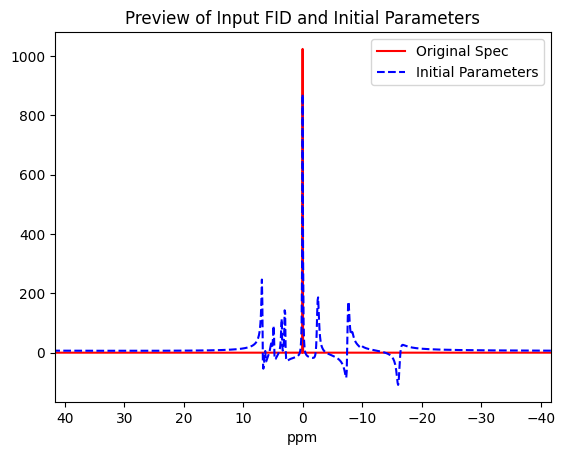

Printing the Prior Knowledge File example_human_brain_31P_7T.csv


,BATP,BATP2,BATP3,AATP,AATP2,GATP,GATP2,UDPG,NAD,PCr,GPC,GPE,Pin,Pex,PC,PE
Index,,,,,,,,,,,,,,,,
Initial Values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amplitude,1.41,BATP/2,BATP/2,1.545,AATP,1.5,GATP,0.08,0.41,4.37,1.32,0.8,0.85,0.3,0.3,2.27
chemicalshift,-16.15,BATP-15Hz,BATP+15Hz,-7.49,AATP-16Hz,-2.46,GATP-16Hz,-9.72,-8.25,0,2.95,3.5,4.82,5.24,6.24,6.76
linewidth,58.12,BATP,BATP,32.28,AATP,39.02,GATP,32.37,40.49,15.41,19.96,19.1,21.04,30.91,19.96,22.63
phase,0,BATP,BATP,BATP,BATP,BATP,BATP,BATP,BATP,BATP,BATP,BATP,BATP,BATP,BATP,BATP
g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bounds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amplitude,"(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,"
chemicalshift,"(-16.30,-16.00)","(-16.30,-16.00)","(-16.30,-16.00)","(-7.72,-7.42)","(-7.72,-7.42)","(-2.65,-2.39)","(-2.65,-2.39)","(-9.76,-9.68)","(-8.25,-8.17)","(-0.5, 0.5)","(2.94,2.96)","(3.49,3.51)","(4.81,4.83)","(5.19,5.29)","(6.22,6.26)","(6.71,6.81)"


In [2]:
priorknowledge = pyAMARES.initialize_FID(
    fid=None, priorknowledgefile="example_human_brain_31P_7T.csv", preview=True
)

In [3]:
from copy import deepcopy

params0 = deepcopy(
    priorknowledge.initialParams
)  # Make a copy of initialParams to be perturbed

In [4]:
def perturb_value(value, percentage=5):
    percentage = float(percentage)
    # Generate a random perturbation factor between 0.95 and 1.05
    factor = np.random.uniform(1 - percentage / 100, 1 + percentage / 100)
    # Apply the perturbation factor
    result = value * factor
    # print(f"Perturbing input {value=} to {result=}")
    return result


def perturb_table(inputparams, percentage=5, freq_shift=5, phase_shift=0):
    params = deepcopy(inputparams)
    for i in params:
        if params[i].name.startswith("ak") or params[i].name.startswith("dk"):
            params[i].value = perturb_value(params[i].value)
        if params[i].name.startswith("freq"):
            params[i].value += np.random.uniform(-freq_shift, freq_shift)
        if params[i].name.startswith("phi"):
            params[i].value += np.random.uniform(
                -np.deg2rad(phase_shift), np.deg2rad(phase_shift)
            )
    return params

In [6]:
paramlist = []
for i in range(8):
    params = perturb_table(params0, percentage=5, freq_shift=5, phase_shift=0)
    paramlist.append(params)

In [7]:
fidlist = []
for params in paramlist:
    fid = pyAMARES.kernel.fid.simulate_fid(
        params,
        MHz=120.0,
        sw=10000.0,
        deadtime=200e-6,
        fid_len=1024,
        snr_target=20,
        preview=False,
    )
    fidlist.append(fid)

In [8]:
FIDobj = pyAMARES.initialize_FID(
    fid=fidlist[0],
    MHz=120.0,
    sw=10000.0,
    deadtime=200e-6,
    normalize_fid=False,
    priorknowledgefile="example_human_brain_31P_7T.csv",
    preview=False,
)

Checking comment lines in the prior knowledge file
Comment: in line 0 "#  Ren et al, NMR Biomed . 2015 Nov;28(11):1455-62. doi: 10.1002/nbm.3384.",,,,,,,,,,,,,,,,

Comment: in line 14 # Use the same phase for all peaks,,,,,,,,,,,,,,,,

Comment: in line 15 " # 2024/06/24 In Ren et al, the chemical shift range of BATP (0.1 ppm), AATP (0.04 ppm), and GATP (0.02 ppm) are smaller than the J-couplin range (0.125 - 0.25 ppm). ",,,,,,,,,,,,,,,,

Comment: in line 16 "# So, increase the chemical shift range",,,,,,,,,,,,,,,,



/home/xujia/gitlab/pyAMARES/pyAMARES/kernel/PriorKnowledge.py:314: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pk = pk.applymap(
/home/xujia/gitlab/pyAMARES/pyAMARES/kernel/PriorKnowledge.py:315: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  lambda x: pd.to_numeric(x, errors="ignore")
/home/xujia/gitlab/pyAMARES/pyAMARES/kernel/PriorKnowledge.py:86: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")


A copy of the input fid_parameters will be returned because inplace=False
Autogenerated tol is 3.219e-06
Fitting with method=leastsq took 0.666415 seconds
Estimated CRLBs are calculated using the default noise variance estimation used by OXSA.
a_sd is all None, use crlb instead!
freq_sd is all None, use crlb instead!
lw_sd is all None, use crlb instead!
phase_sd is all None, use crlb instead!
g_std is all None, use crlb instead!
It seems that zeros are padded after 1024
Remove padded zeros from residual estimation!
Lmfit Fitting Results:
----------------
Number of function evaluations (nfev): 309
Reduced chi-squared (redchi): 0.040461910956847875
Fit success status: Success
Fit message: Fit succeeded. Could not estimate error-bars.
Norm of residual = 81.369
Norm of the data = 2385.064
resNormSq / dataNormSq = 0.034


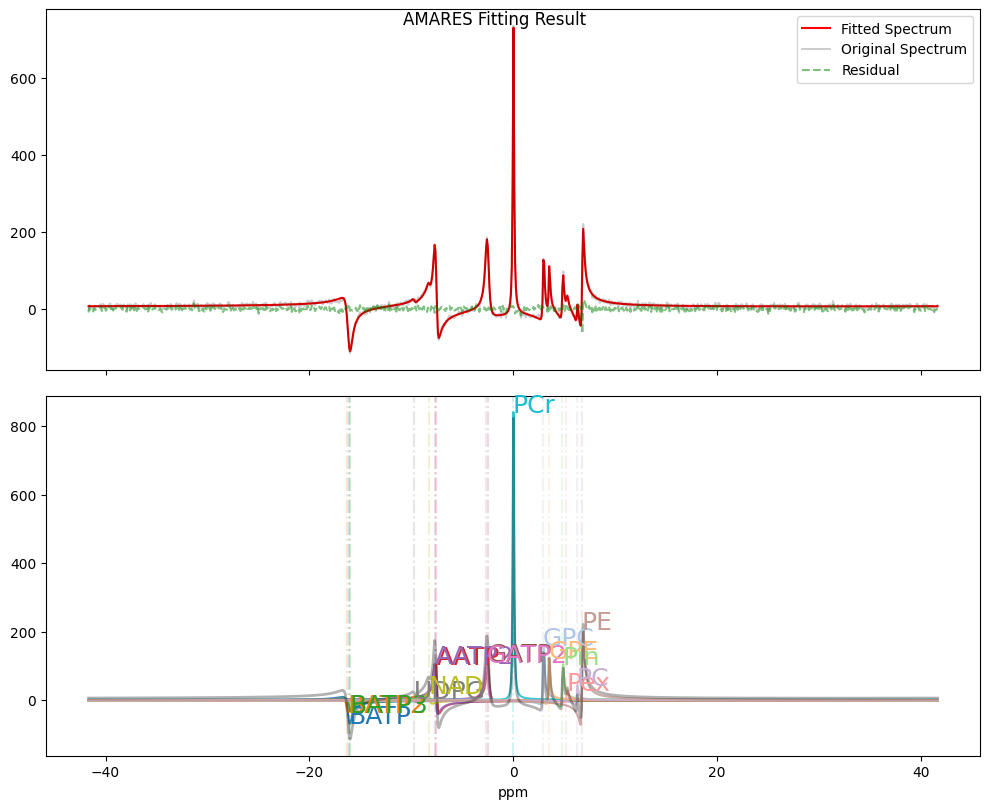

In [9]:
out1 = pyAMARES.fitAMARES(
    fid_parameters=FIDobj,
    fitting_parameters=FIDobj.initialParams,
    method="leastsq",
    ifplot=True,
    inplace=False,
)

In [10]:
out1.styled_df

,amplitude,sd,CRLB(%),chem shift(ppm),sd(ppm),CRLB(cs%),LW(Hz),sd(Hz),CRLB(LW%),phase(deg),sd(deg),CRLB(phase%),g,g_sd,g (%),SNR
name,,,,,,,,,,,,,,,,
BATP,2.924,0.081,2.778,-16.150,-0.007,0.045,56.887,2.485,4.369,2.536,0.451,17.786,0.000,nan,nan,12.198
AATP,2.958,0.078,2.622,-7.517,-0.003,0.046,31.448,1.335,4.246,2.536,0.451,17.786,0.000,nan,nan,12.342
GATP,3.118,0.070,2.230,-2.484,-0.004,0.174,41.157,1.471,3.573,2.536,0.451,17.786,0.000,nan,nan,13.007
UDPG,0.135,0.060,44.113,-9.720,-0.062,0.633,35.506,21.534,60.649,2.536,0.451,17.786,0.000,nan,nan,0.565
NAD,0.470,0.088,18.768,-8.250,-0.028,0.335,46.155,10.813,23.427,2.536,0.451,17.786,0.000,nan,nan,1.960
PCr,4.235,0.038,0.904,-0.005,-0.001,15.532,15.767,0.200,1.267,2.536,0.451,17.786,0.000,nan,nan,17.668
GPC,1.271,0.045,3.538,2.940,0.003,0.098,20.261,0.993,4.902,2.536,0.451,17.786,0.000,nan,nan,5.303
GPE,0.772,0.042,5.436,3.492,0.004,0.109,17.600,1.324,7.522,2.536,0.451,17.786,0.000,nan,nan,3.220
Pin,0.876,0.051,5.874,4.820,0.004,0.092,21.040,1.634,7.767,2.536,0.451,17.786,0.000,nan,nan,3.654


In [11]:
fidarr = np.array(fidlist)
fidarr.shape

(8, 1024)

In [12]:
result_list = pyAMARES.run_parallel_fitting_with_progress(
    fidarr,  # 2D array of FIDs. Here, `fid3.shape=(366,1024)` indicates 366 FIDs, each with 1024 points.
    FIDobj_shared=out1,  # Use the FID object `out2` for fitting all FIDs.
    initial_params=out1.fittedParams,  # Use the fitted results of the first FID as the initial parameters.
    num_workers=4,  # Parallel processing with 2 sessions if used in Google Colab, suitable for the 2 CPUs available in Google Colab.
    initialize_with_lm=True,
    method="leastsq",
)  # Use the Levenberg-Marquardt method by default for faster processing.

Processing Datasets:   0%|          | 0/8 [00:00<?, ?it/s]

Fitting 8 spectra with 4 processors took 6 seconds


In [14]:
pyAMARES.highlight_dataframe(result_list[0])

,amplitude,sd,CRLB(%),chem shift(ppm),sd(ppm),CRLB(cs%),LW(Hz),sd(Hz),CRLB(LW%),phase(deg),sd(deg),CRLB(phase%),g,g_sd,g (%),SNR
name,,,,,,,,,,,,,,,,
BATP,1.462,0.041,2.778,-16.150,-0.007,0.045,56.887,2.485,4.369,2.536,0.451,17.786,0.000,nan,nan,6.099
BATP2,0.731,0.020,2.778,-16.275,-0.007,0.044,56.887,2.485,4.369,2.536,0.451,17.786,0.000,nan,nan,3.050
BATP3,0.731,0.020,2.778,-16.025,-0.007,0.045,56.887,2.485,4.369,2.536,0.451,17.786,0.000,nan,nan,3.050
AATP,1.479,0.039,2.622,-7.517,-0.003,0.046,31.448,1.335,4.246,2.536,0.451,17.786,0.000,nan,nan,6.171
AATP2,1.479,0.039,2.622,-7.650,-0.003,0.045,31.448,1.335,4.246,2.536,0.451,17.786,0.000,nan,nan,6.171
GATP,1.559,0.035,2.230,-2.484,-0.004,0.174,41.157,1.471,3.573,2.536,0.451,17.786,0.000,nan,nan,6.503
GATP2,1.559,0.035,2.230,-2.617,-0.004,0.166,41.157,1.471,3.573,2.536,0.451,17.786,0.000,nan,nan,6.503
UDPG,0.135,0.060,44.113,-9.720,-0.062,0.633,35.506,21.534,60.649,2.536,0.451,17.786,0.000,nan,nan,0.565
NAD,0.470,0.088,18.768,-8.250,-0.028,0.335,46.155,10.813,23.427,2.536,0.451,17.786,0.000,nan,nan,1.960
